In [1]:
###
# Developed By Prathamesh Patil In Completion of 
#
#
###
## Define Parameters

n <- 0.001
l <- 0  
r <- 8

s <- (r - l)/n 
x <- seq(l,r,n)

step   <- 0 
stop   <- 100

## Define  Vectors 

guess <- 1:2
error <- 1:stop


g <- x*0
h <- g
j <- g

library(splines)


In [2]:
## Define Runge Kutta for funk
funk <- function(x,g,h,j,guess){
    
g <- x*0
h <- g
j <- g
    
        g[1] <- -k
        h[1] <- 0
        j[1] <- guess

    for(i in 1:(s)){

        K1 <- f1(x[i],g[i],h[i],j[i])
        L1 <- f2(x[i],g[i],h[i],j[i])
        M1 <- f3(x[i],g[i],h[i],j[i])

        K2 <-  f1( x[i] + 1/2*n, g[i] + 1/2*K1*n, h[i] + 1/2*L1*n, j[i] + 1/2*M1*n )
        L2 <-  f2( x[i] + 1/2*n, g[i] + 1/2*K1*n, h[i] + 1/2*L1*n, j[i] + 1/2*M1*n )
        M2 <-  f3( x[i] + 1/2*n, g[i] + 1/2*K1*n, h[i] + 1/2*L1*n, j[i] + 1/2*M1*n )

        K3 <-  f1( x[i] + n/2, g[i] + (n)*(-K1+2*K2), h[i]  + (n)*(-L1+2*L2) , j[i]  + (n)*(-M1+2*M2) )
        L3 <-  f2( x[i] + n/2, g[i] + (n)*(-K1+2*K2), h[i]  + (n)*(-L1+2*L2) , j[i]  + (n)*(-M1+2*M2) )
        M3 <-  f3( x[i] + n/2, g[i] + (n)*(-K1+2*K2), h[i]  + (n)*(-L1+2*L2) , j[i]  + (n)*(-M1+2*M2) )

        g[i+1] <-  g[i] + n*(K1 + 4*K2 + K3)/6
        h[i+1] <-  h[i] + n*(L1 + 4*L2 + L3)/6
        j[i+1] <-  j[i] + n*(M1 + 4*M2 + M3)/6

        i <- i+1

    }
    
    return(list(g = g, h = h, j = j))
    
    
}

## Guessing Function objective for funk 

objectivefunk <- function(l,u){
    
    v <- funk(x,g,h,j,l)
    w <- funk(x,g,h,j,u)

    guess[c(1,2)] <- c(l,u)

    model    <- lm(formula = y ~ x, data.frame(y = guess[1:2] , x =  c( max(v$h), max(w$h)) ) )

    newguess <- predict(model,  newdata = data.frame(x = 1))
    
    return(list( newguess = newguess, v = v, w = w))
}


update <- function(n,guess){

    guess[which.min(abs(n - guess)) ] <- n
    return( guess)
    
 }


f1 <- function(x,g,h,j){ return(h) }                                   
f2 <- function(x,g,h,j){ return(j) }                                    
f3 <- function(x,g,h,j){ return( -g*j*L)  }    


[1] "1 0.403616867715196 1 0.447418877262282 2.08540917644269"
[1] "2 0.316063102526208 1 1.1389479917902 2.08540917644269"
[1] "3 0.335875533162334 1 0.967619615417559 2.08540917644269"
[1] "4 0.331162947848124 1 1.00764771597831 2.08540917644269"
[1] "5 0.332270447453425 1 0.998199722356788 2.08540917644269"
[1] "6 0.33200943951241 1 1.0004240962074 2.08540917644269"
[1] "7 0.332070911138783 1 0.999900094087684 2.08540917644269"
[1] "8 0.332056431298465 1 1.00002351750307 2.08540917644269"
[1] "9 0.332059841945704 1 0.99999444540505 2.08540917644269"
[1] "10 0.332059038579405 1 1.00000129321691 2.08540917644269"
[1] "11 0.332059227809202 1 0.999999680240348 2.08540917644269"
[1] "12 0.332059183236839 1 1.0000000601708 2.08540917644269"
[1] "13 0.332059193735687 1 0.99999997067963 2.08540917644269"
[1] "14 0.332059191262726 1 0.999999991758926 2.08540917644269"
[1] "15 0.33205919184522 1 0.999999986793786 2.08540917644269"
[1] "16 0.332059191708016 1 0.999999987963303 2.08540917644269

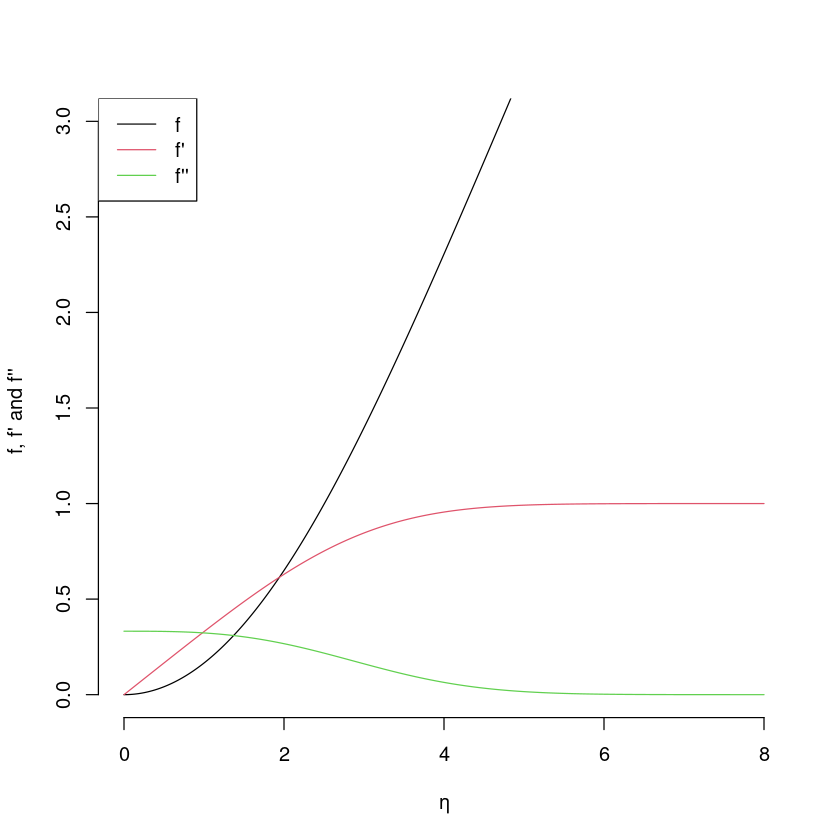

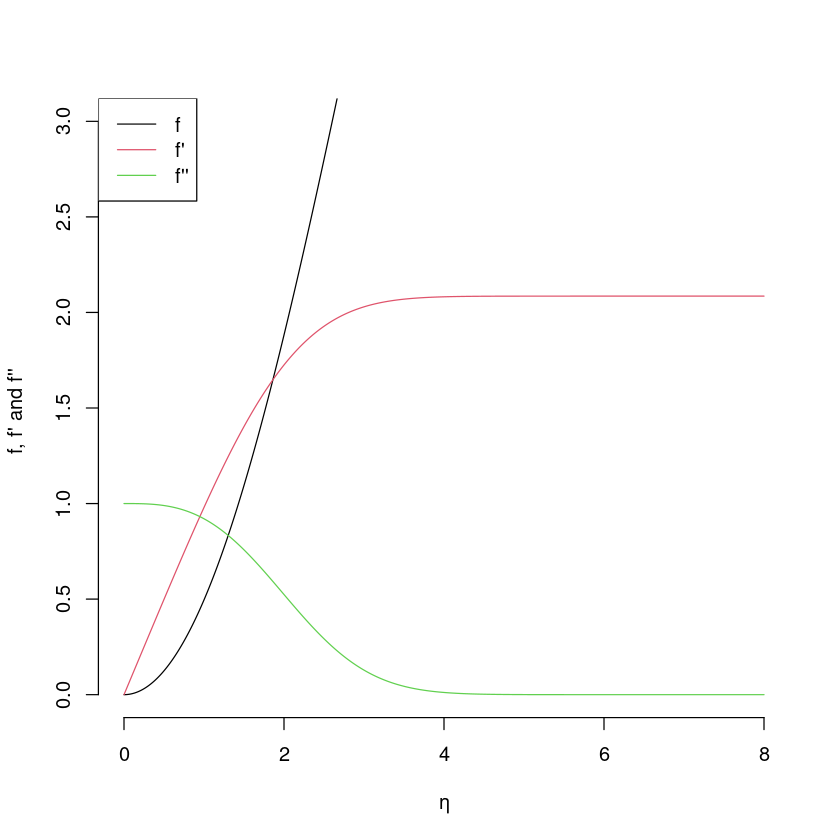

In [203]:

## Main loop for funk 

k <- 0
L <- 0.5


guess <- c(0.1, 1)

newguess <- guess

step <- 0

while(step < 30){

    data <- objectivefunk(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}



plot(data$v$g, x = x, typ = "l", col = 1, bty = "n", xlab = "\u03B7", ylab = "f, f' and f'' ", ylim = c(0,3))
lines(data$v$h,x = x, typ = "l", col = 2)
lines(data$v$j,x = x, typ = "l", col = 3)
legend(x = "topleft", legend = c("f", "f'", "f''"), col = 1:8, lty = 1)

plot(data$w$g, x = x, typ = "l", col = 1, bty = "n", xlab = "\u03B7", ylab = "f, f' and f'' ", ylim = c(0,3))
lines(data$w$h,x = x, typ = "l", col = 2)
lines(data$w$j,x = x, typ = "l", col = 3)
legend(x = "topleft", legend = c("f", "f'", "f''"), col = 1:8, lty = 1)


data1 <- data$v

[1] "1 0.474161080271594 1 0.397506841358759 1.8467316096716"
[1] "2 0.384849199617199 1 1.12293439660426 1.8467316096716"
[1] "3 0.401060632794946 1 0.977081598394001 1.8467316096716"
[1] "4 0.397980888592952 1 1.00433161786327 1.8467316096716"
[1] "5 0.398560849482497 1 0.999183506347559 1.8467316096716"
[1] "6 0.398451454296194 1 1.00015398313601 1.8467316096716"
[1] "7 0.39847208256111 1 0.999970962886 1.8467316096716"
[1] "8 0.398468192533841 1 1.00000547565112 1.8467316096716"
[1] "9 0.398468926097472 1 0.999998967364644 1.8467316096716"
[1] "10 0.398468787765093 1 1.0000001946693 1.8467316096716"
[1] "11 0.398468813851227 1 0.999999963229346 1.8467316096716"
[1] "12 0.398468808932015 1 1.00000000687331 1.8467316096716"
[1] "13 0.398468809859659 1 0.99999999864312 1.8467316096716"
[1] "14 0.398468809684729 1 1.00000000019513 1.8467316096716"
[1] "15 0.398468809717718 1 0.999999999902459 1.8467316096716"
[1] "16 0.398468809711492 1 0.99999999995766 1.8467316096716"
[1] "17 0.39846

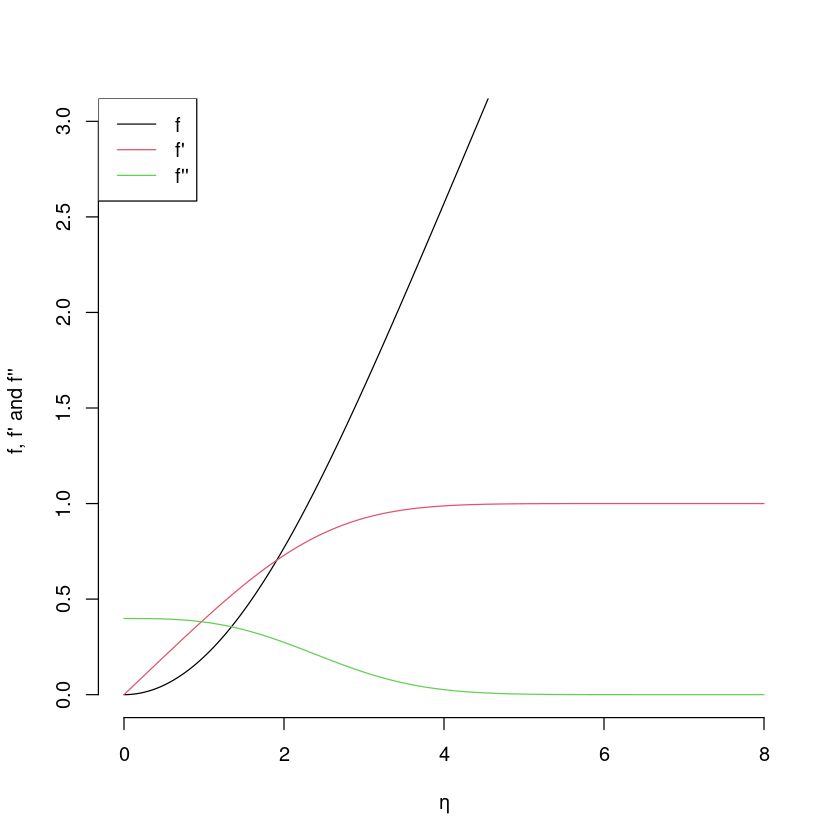

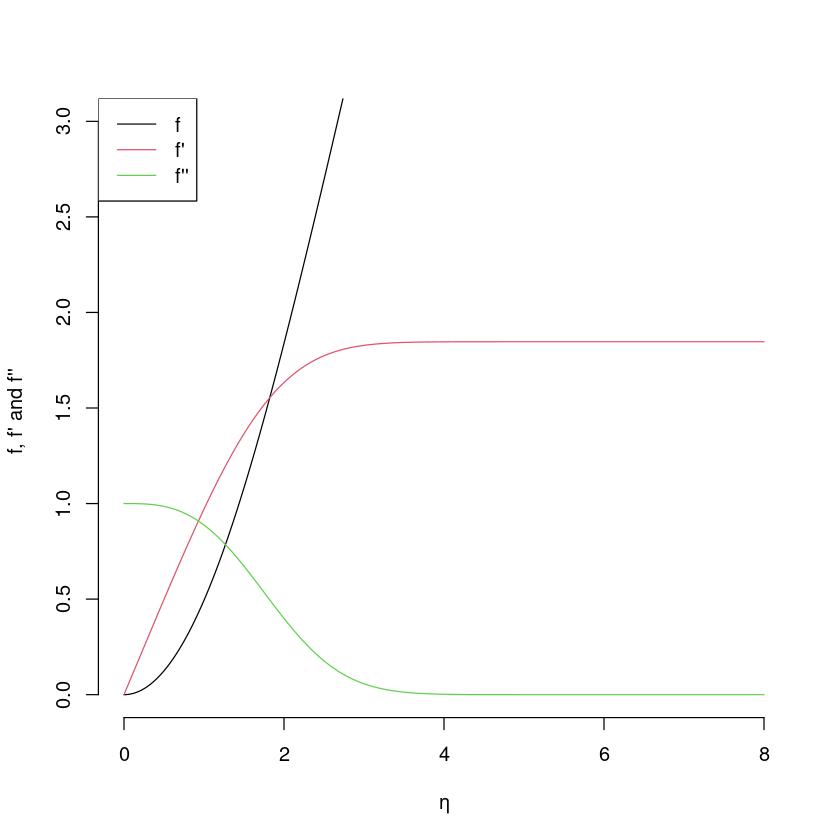

In [204]:

## Main loop for funk 

k <- 0
L <- 0.72

guess <- c(0.1, 1)

newguess <- guess

step <- 0

while(step < 30){

    data <- objectivefunk(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}


plot(data$v$g, x = x, typ = "l", col = 1, bty = "n", xlab = "\u03B7", ylab = "f, f' and f'' ", ylim = c(0,3))
lines(data$v$h,x = x, typ = "l", col = 2)
lines(data$v$j,x = x, typ = "l", col = 3)
legend(x = "topleft", legend = c("f", "f'", "f''"), col = 1:8, lty = 1)

plot(data$w$g, x = x, typ = "l", col = 1, bty = "n", xlab = "\u03B7", ylab = "f, f' and f'' ", ylim = c(0,3))
lines(data$w$h,x = x, typ = "l", col = 2)
lines(data$w$j,x = x, typ = "l", col = 3)
legend(x = "topleft", legend = c("f", "f'", "f''"), col = 1:8, lty = 1)


data2 <- data$v

[1] "1 0.1 0.726055025625497 0.283033385630324 1.31372545953905"
[1] "2 0.1 0.676781107490205 0.283033385630324 1.06124984637895"
[1] "3 0.1 0.666761507872489 0.283033385630324 1.01267502875288"
[1] "4 0.1 0.664670283928747 0.283033385630324 1.00265524464817"
[1] "5 0.1 0.664231415145661 0.283033385630324 1.00055766881604"
[1] "6 0.1 0.664139206823193 0.283033385630324 1.00011718789957"
[1] "7 0.1 0.664119828735504 0.283033385630324 1.00002462852962"
[1] "8 0.1 0.664115756115806 0.283033385630324 1.00000517612267"
[1] "9 0.1 0.664114900179491 0.283033385630324 1.00000108785951"
[1] "10 0.1 0.664114720288246 0.283033385630324 1.00000022863438"
[1] "11 0.1 0.664114682480672 0.283033385630324 1.00000004805188"
[1] "12 0.1 0.664114674534693 0.283033385630324 1.00000001009901"
[1] "13 0.1 0.664114672864689 0.283033385630324 1.00000000212251"
[1] "14 0.1 0.664114672513709 0.283033385630324 1.00000000044608"
[1] "15 0.1 0.664114672439942 0.283033385630324 1.00000000009376"
[1] "16 0.1 0.66411

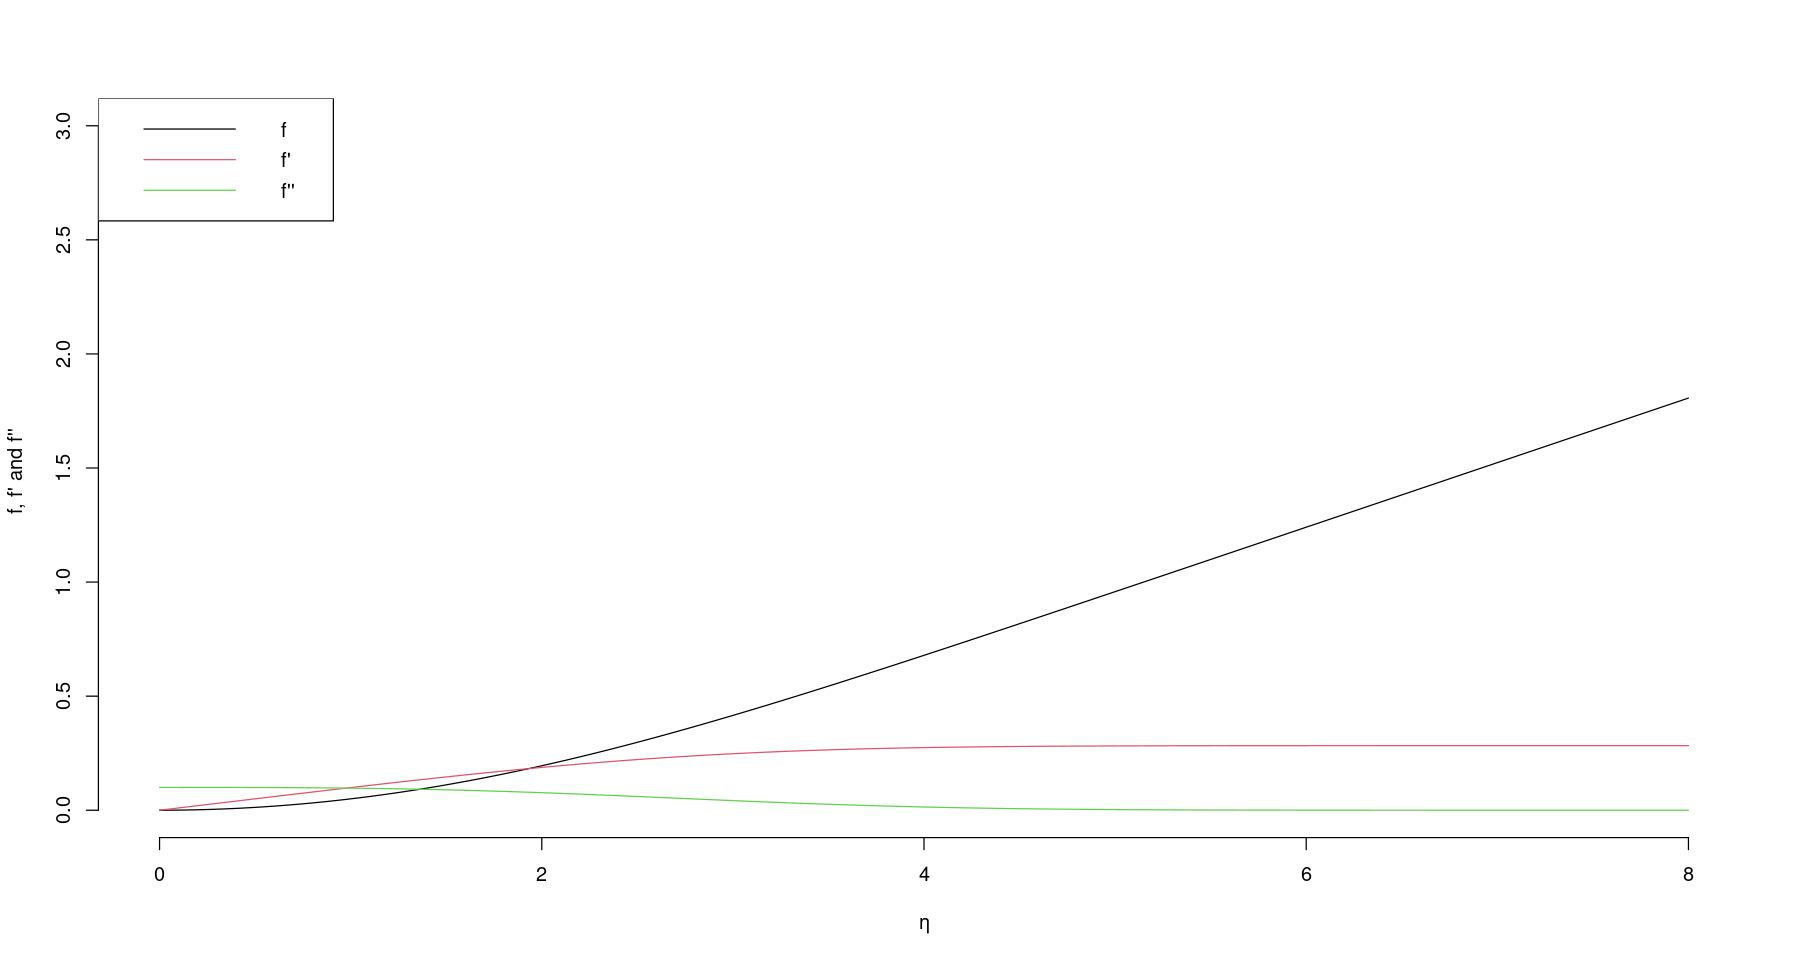

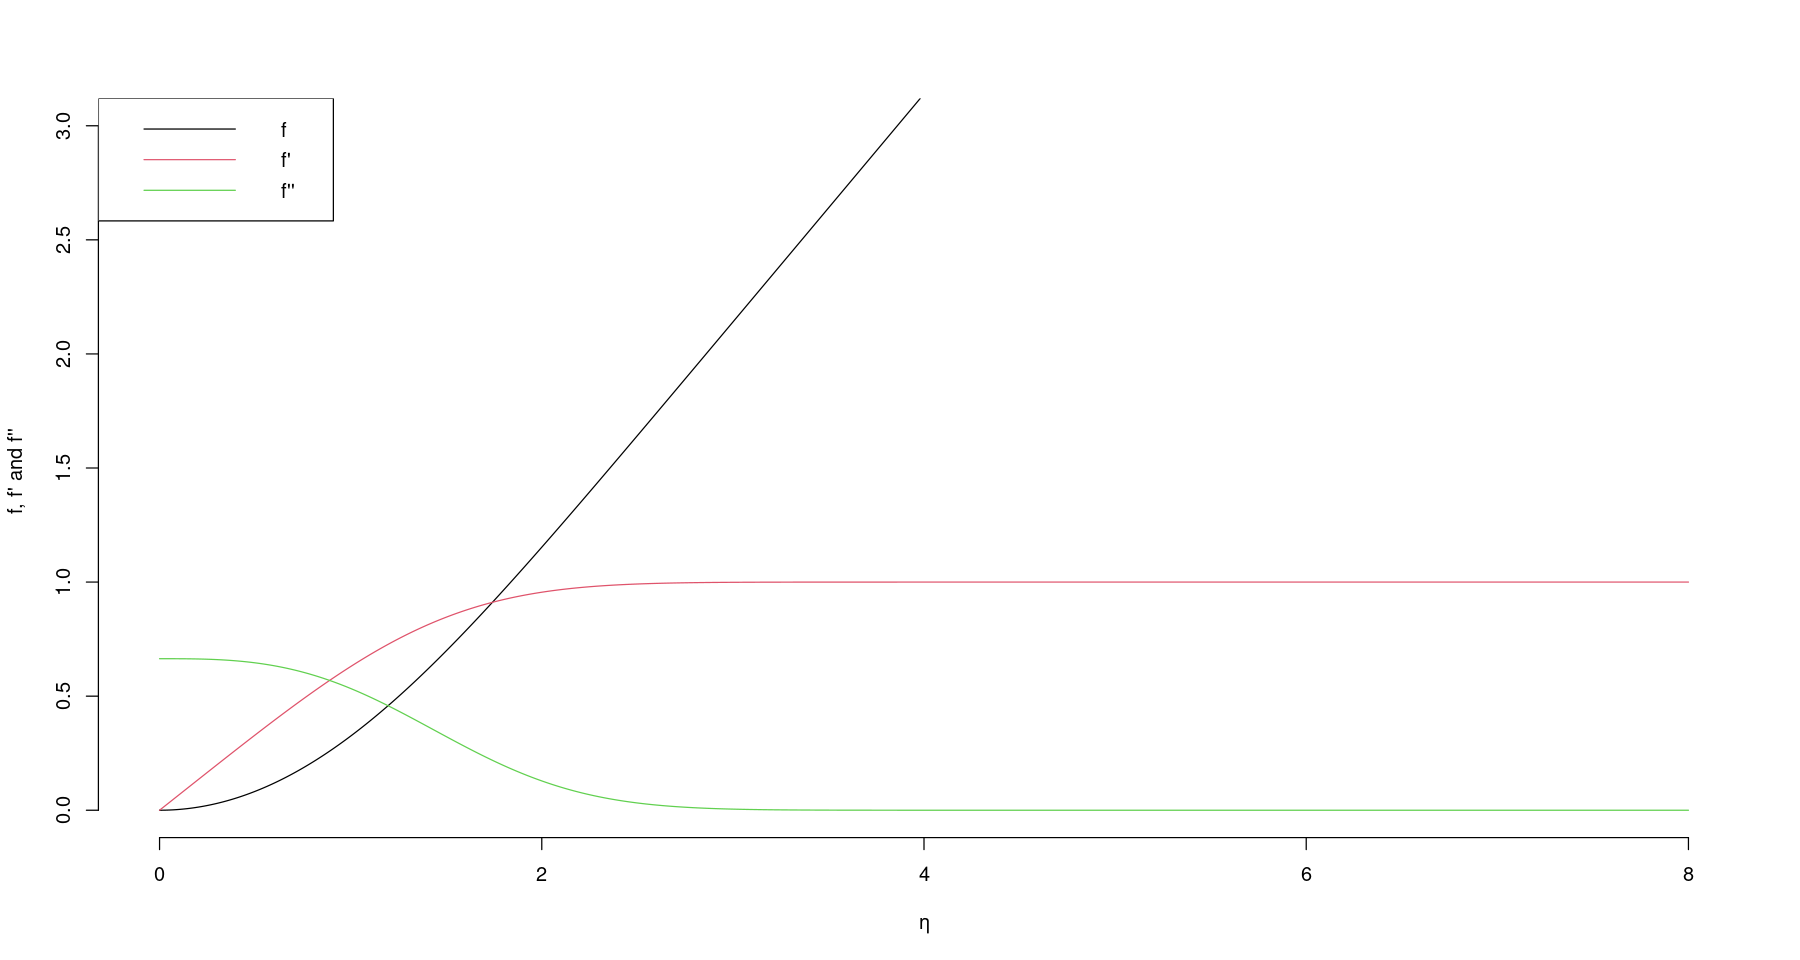

In [299]:

## Main loop for funk 

k <- 0
L <- 3


guess <- c(0.1, 1)

newguess <- guess

step <- 0

while(step < 30){

    data <- objectivefunk(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}



plot(data$v$g, x = x, typ = "l", col = 1, bty = "n", xlab = "\u03B7", ylab = "f, f' and f'' ", ylim = c(0,3))
lines(data$v$h,x = x, typ = "l", col = 2)
lines(data$v$j,x = x, typ = "l", col = 3)
legend(x = "topleft", legend = c("f", "f'", "f''"), col = 1:8, lty = 1)

plot(data$w$g, x = x, typ = "l", col = 1, bty = "n", xlab = "\u03B7", ylab = "f, f' and f'' ", ylim = c(0,3))
lines(data$w$h,x = x, typ = "l", col = 2)
lines(data$w$j,x = x, typ = "l", col = 3)
legend(x = "topleft", legend = c("f", "f'", "f''"), col = 1:8, lty = 1)


data3 <- data$w

[1] "1 0.1 2.9915593731435 0.0346703089209918 1"
[1] "2 0.1 2.9915593731435 0.0346703089209918 1"
[1] "3 0.1 2.9915593731435 0.0346703089209918 1"
[1] "4 0.1 2.9915593731435 0.0346703089209918 1"
[1] "5 0.1 2.9915593731435 0.0346703089209918 1"
[1] "6 0.1 2.9915593731435 0.0346703089209918 1"
[1] "7 0.1 2.9915593731435 0.0346703089209918 1"
[1] "8 0.1 2.9915593731435 0.0346703089209918 1"
[1] "9 0.1 2.9915593731435 0.0346703089209918 1"
[1] "10 0.1 2.9915593731435 0.0346703089209918 1"
[1] "11 0.1 2.9915593731435 0.0346703089209918 1"
[1] "12 0.1 2.9915593731435 0.0346703089209918 1"
[1] "13 0.1 2.9915593731435 0.0346703089209918 1"
[1] "14 0.1 2.9915593731435 0.0346703089209918 1"
[1] "15 0.1 2.9915593731435 0.0346703089209918 1"
[1] "16 0.1 2.9915593731435 0.0346703089209918 1"
[1] "17 0.1 2.9915593731435 0.0346703089209918 1"
[1] "18 0.1 2.9915593731435 0.0346703089209918 1"
[1] "19 0.1 2.9915593731435 0.0346703089209918 1"
[1] "20 0.1 2.9915593731435 0.0346703089209918 1"
[1] "21 0

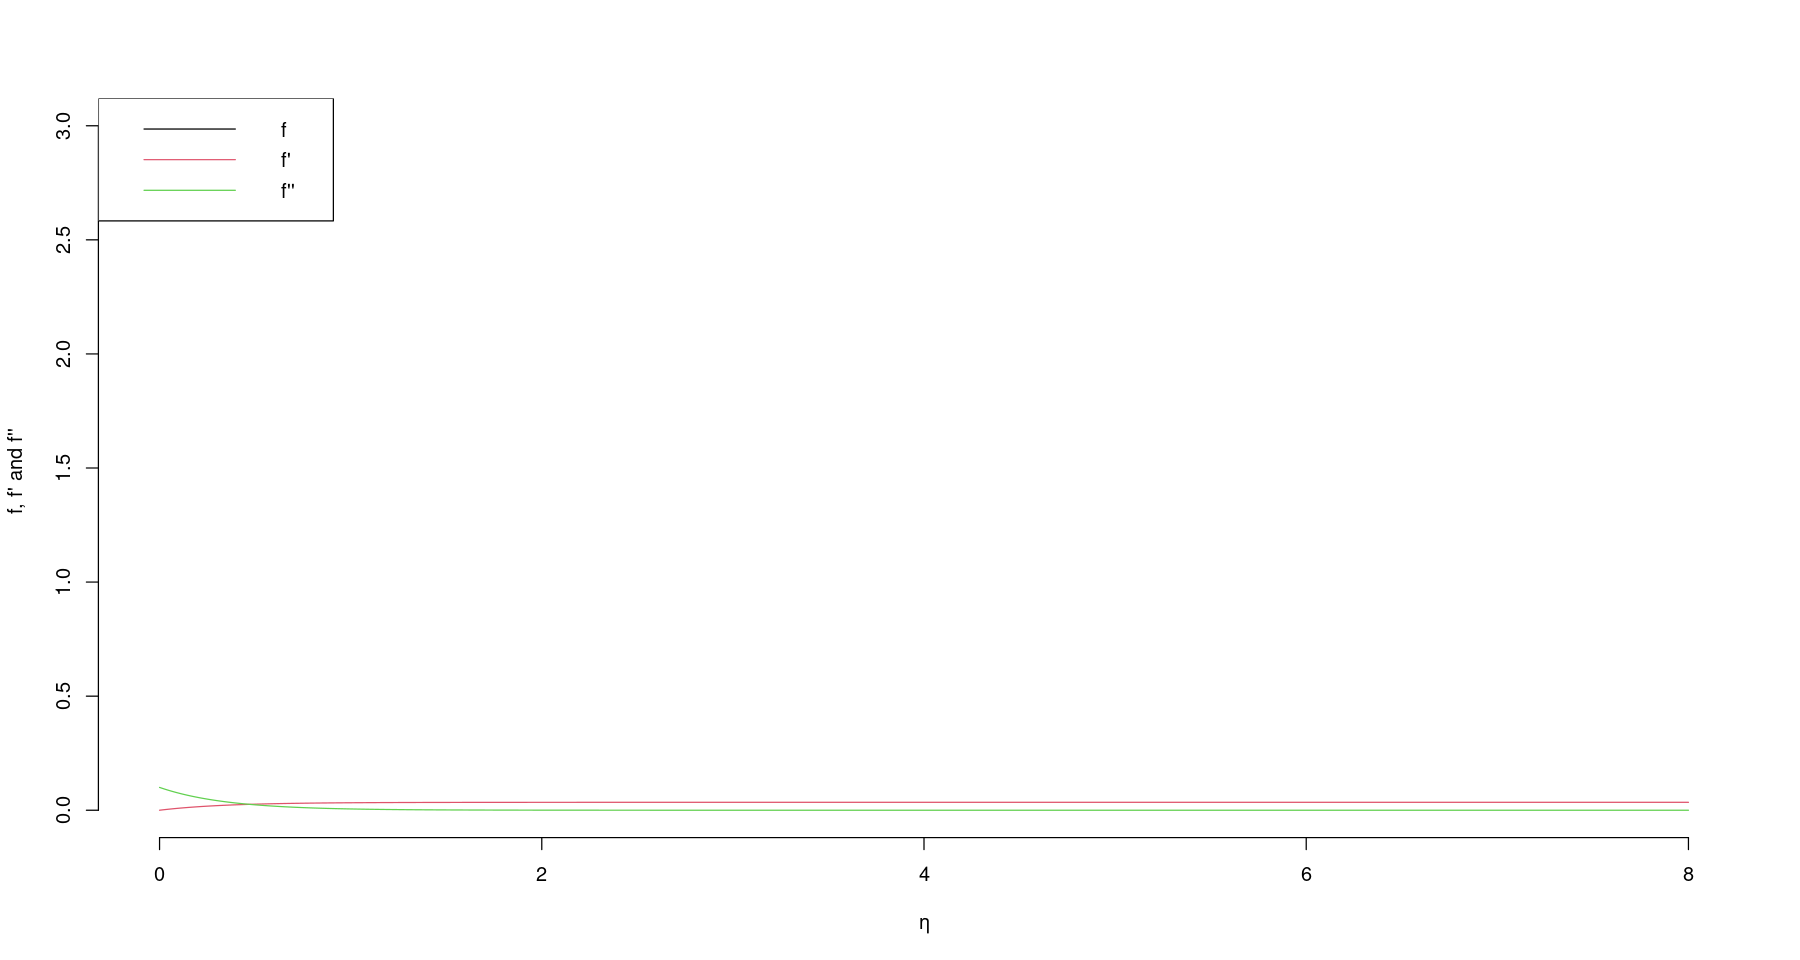

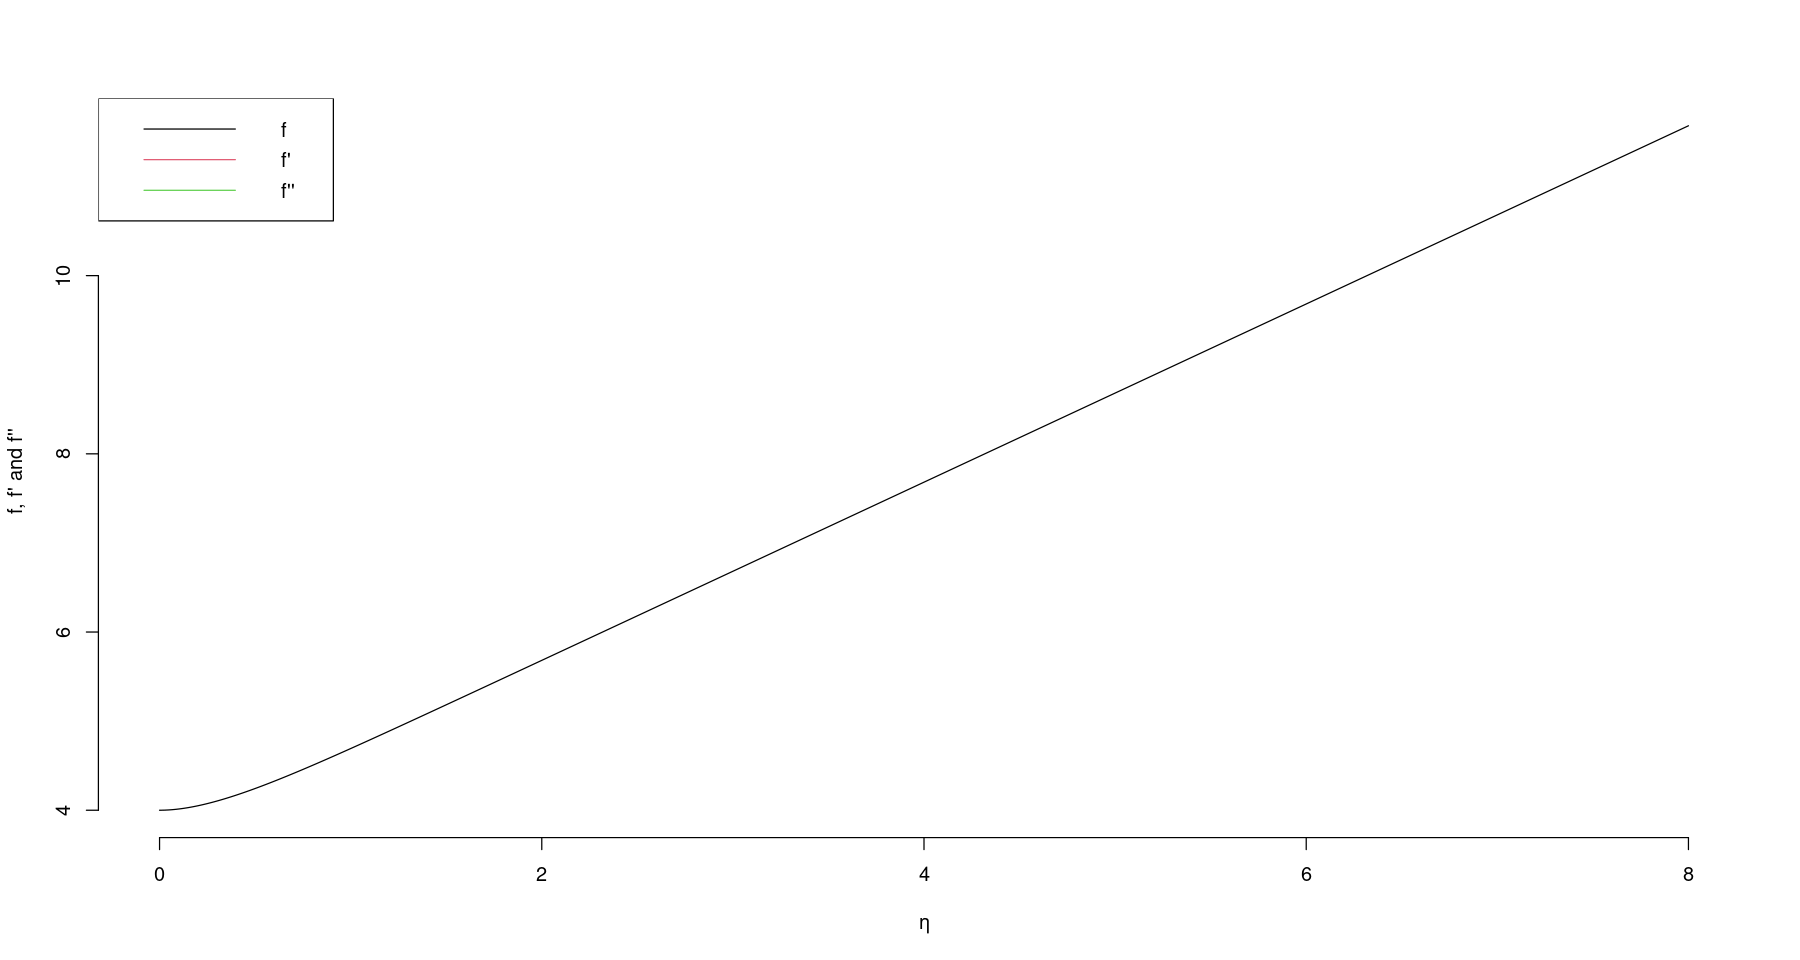

In [336]:

## Main loop for funk 

k <- -4
L <- 0.72

guess <- c(0.1, 1)

newguess <- guess

step <- 0

while(step < 30){

    data <- objectivefunk(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}



plot(data$v$g, x = x, typ = "l", col = 1, bty = "n", xlab = "\u03B7", ylab = "f, f' and f'' ", ylim = c(0,3))
lines(data$v$h,x = x, typ = "l", col = 2)
lines(data$v$j,x = x, typ = "l", col = 3)
legend(x = "topleft", legend = c("f", "f'", "f''"), col = 1:8, lty = 1)

plot(data$w$g, x = x, typ = "l", col = 1, bty = "n", xlab = "\u03B7", ylab = "f, f' and f'' ")
lines(data$w$h,x = x, typ = "l", col = 2)
lines(data$w$j,x = x, typ = "l", col = 3)
legend(x = "topleft", legend = c("f", "f'", "f''"), col = 1:8, lty = 1)


data4 <- data$w

[1] "1 0.1 1.5714547816743 0.0686554261801337 0.638302639962168"
[1] "2 0.1 1.61914730630453 0.0686554261801337 0.970761114587541"
[1] "3 0.1 1.62279995553154 0.0686554261801337 0.997766039443111"
[1] "4 0.1 1.62307792495191 0.0686554261801337 0.999830024907436"
[1] "5 0.1 1.62309906840262 0.0686554261801337 0.999987071203378"
[1] "6 0.1 1.62310067659771 0.0686554261801337 0.999999016621954"
[1] "7 0.1 1.62310079891852 0.0686554261801337 0.999999925203361"
[1] "8 0.1 1.62310080822235 0.0686554261801337 0.9999999943109"
[1] "9 0.1 1.62310080893001 0.0686554261801337 0.999999999567277"
[1] "10 0.1 1.62310080898384 0.0686554261801337 0.999999999967084"
[1] "11 0.1 1.62310080898794 0.0686554261801337 0.999999999997494"
[1] "12 0.1 1.62310080898825 0.0686554261801337 0.999999999999814"
[1] "13 0.1 1.62310080898827 0.0686554261801337 0.999999999999983"
[1] "14 0.1 1.62310080898828 0.0686554261801337 0.999999999999999"
[1] "15 0.1 1.62310080898828 0.0686554261801337 1"
[1] "16 0.1 1.623100808

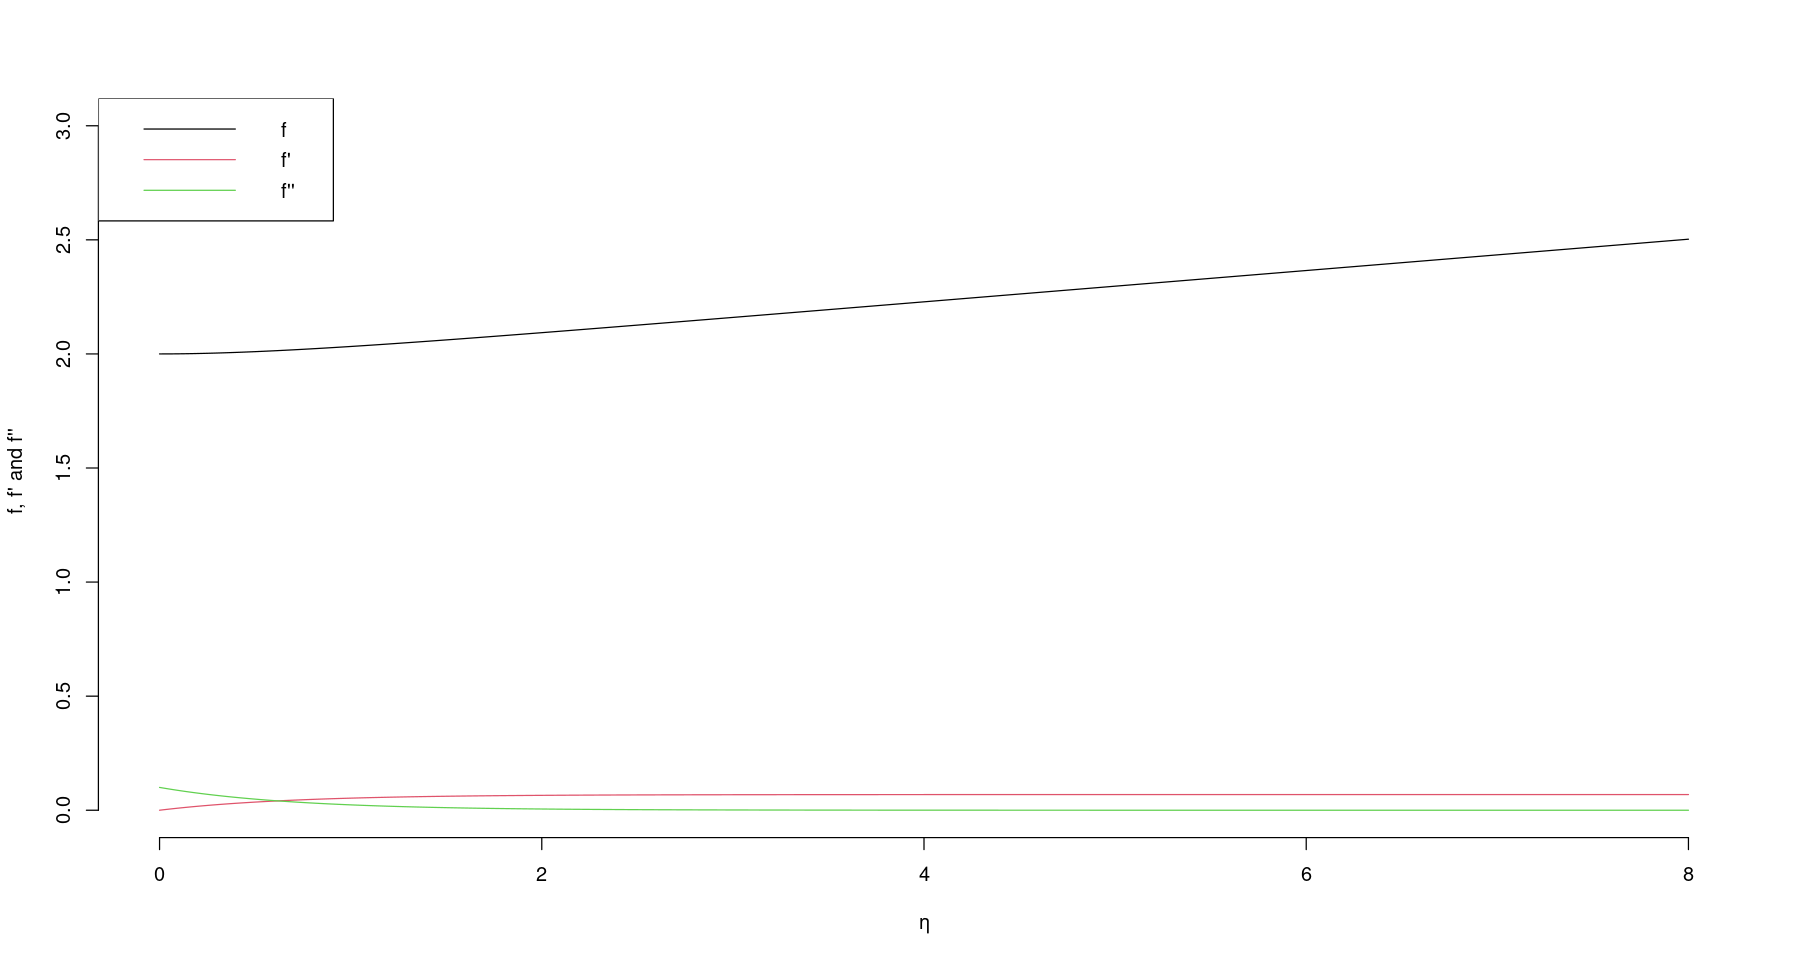

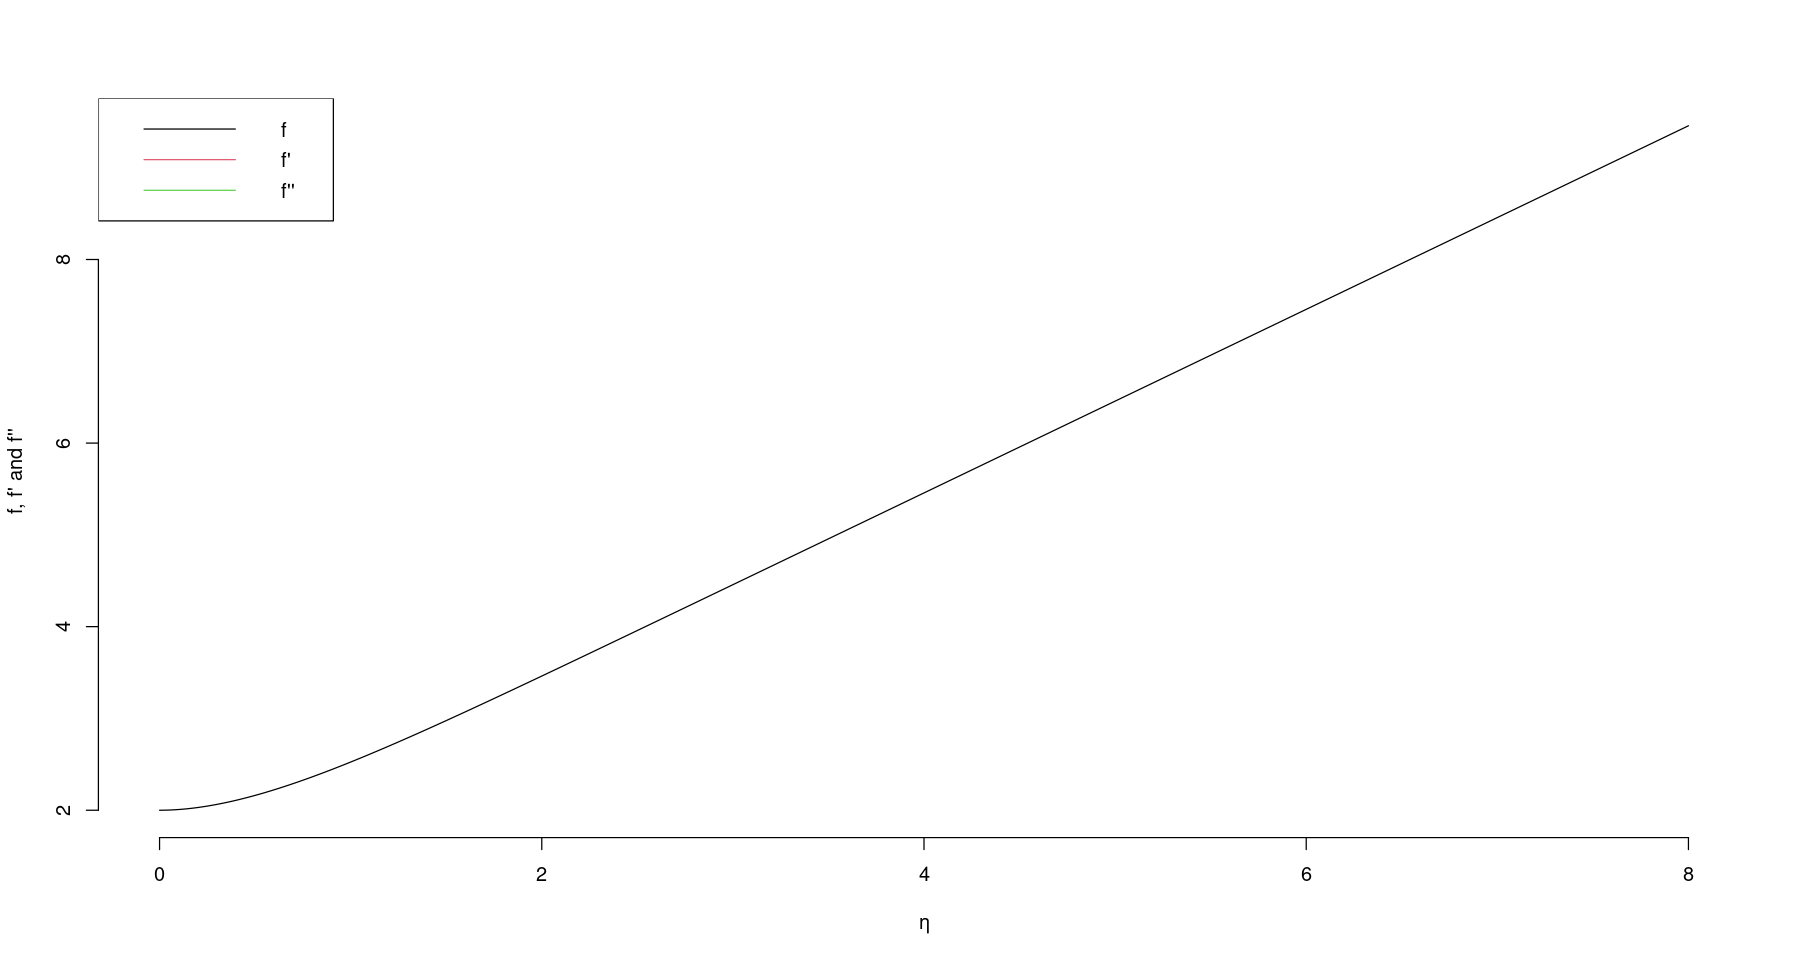

In [354]:

## Main loop for funk 

k <- -2.0
L <- 0.72

guess <- c(0.1, 1)

newguess <- guess

step <- 0

while(step < 30){

    data <- objectivefunk(guess[1], guess[2])
    guess <- update(data$newguess, guess)
    
    step <- step + 1
    
    print(paste(step, guess[1], guess[2], data$v$h[s], data$w$h[s]  ) )
}


plot(data$v$g, x = x, typ = "l", col = 1, bty = "n", xlab = "\u03B7", ylab = "f, f' and f'' ", ylim = c(0,3))
lines(data$v$h,x = x, typ = "l", col = 2)
lines(data$v$j,x = x, typ = "l", col = 3)
legend(x = "topleft", legend = c("f", "f'", "f''"), col = 1:8, lty = 1)

plot(data$w$g, x = x, typ = "l", col = 1, bty = "n", xlab = "\u03B7", ylab = "f, f' and f'' ")
lines(data$w$h,x = x, typ = "l", col = 2)
lines(data$w$j,x = x, typ = "l", col = 3)
legend(x = "topleft", legend = c("f", "f'", "f''"), col = 1:8, lty = 1)


data5 <- data$w

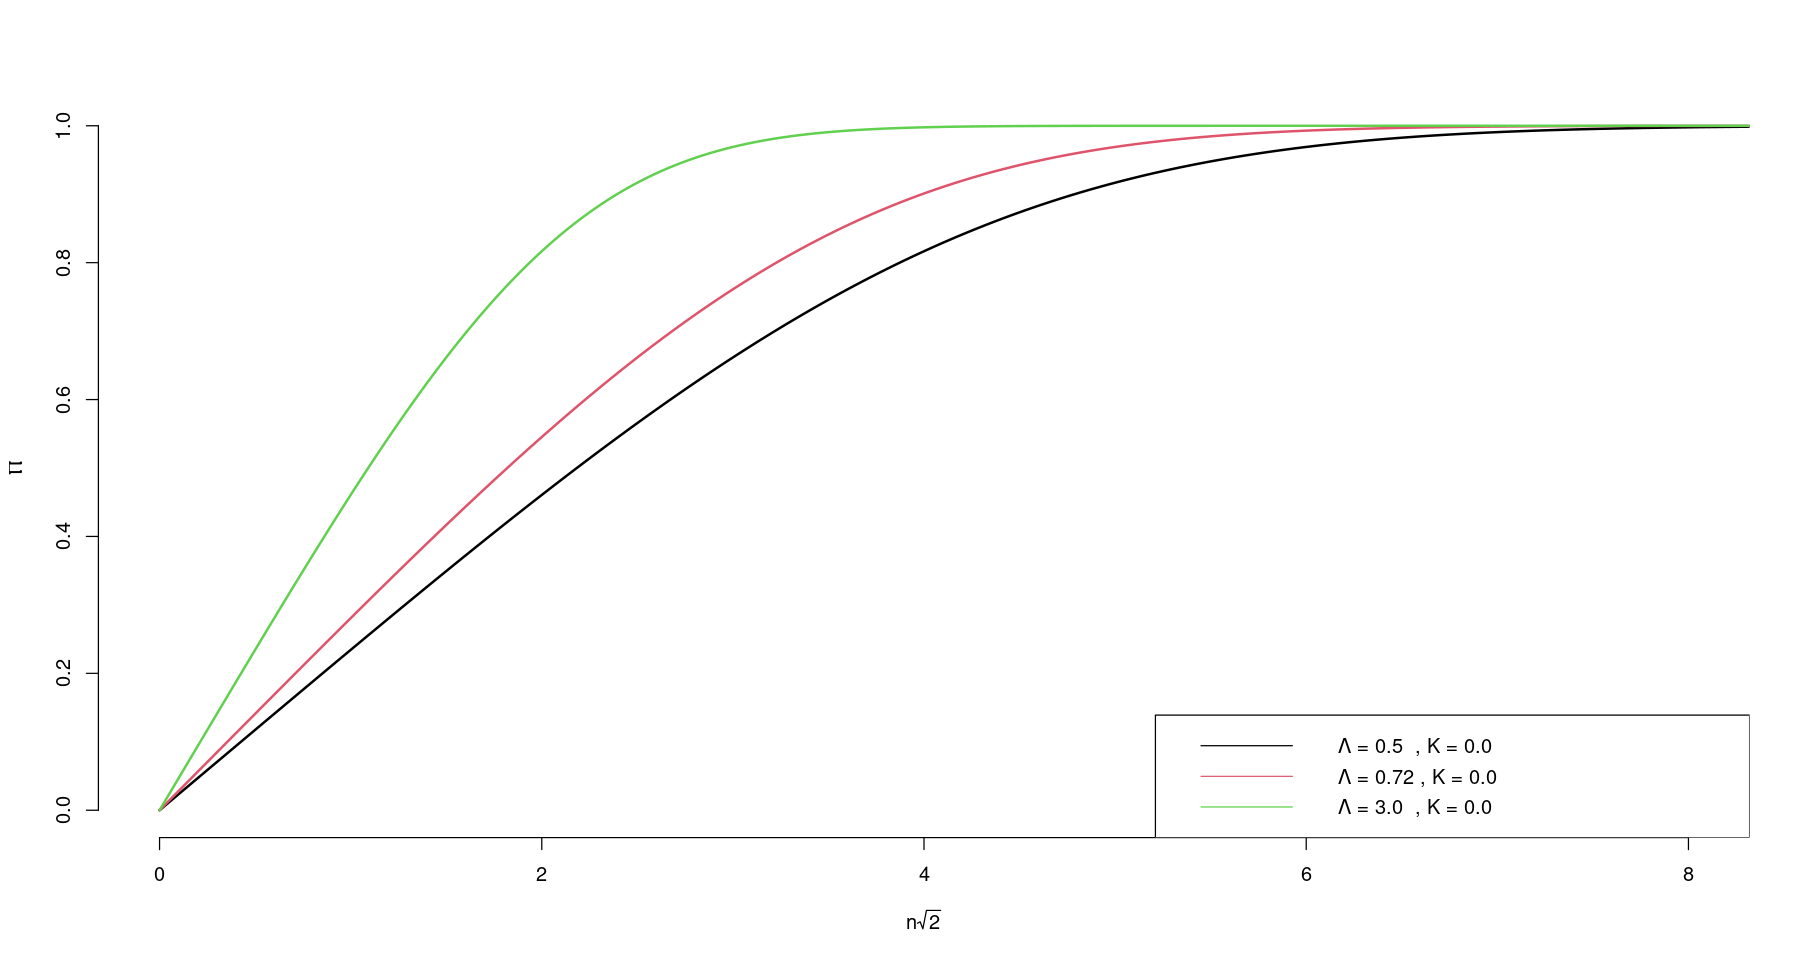

In [362]:
options(repr.plot.width=15, repr.plot.height=8)

plot(  data1$h, x = x*sqrt(2), typ = "l", col = 1, xlim = c(0,8), bty = "n", ylim = c(0,1),  lwd = 2, xlab = expression(n *sqrt(2)), ylab = "\U02CA0" )
lines( data2$h, x = x*sqrt(2), col = 2,  lwd = 2 )
lines( data3$h, x = x*sqrt(2), col = 3,  lwd = 2 )
# lines( data4$h, x = x*sqrt(2), col = 4,  lwd = 2 )
# lines( data5$h, x = x*sqrt(2), col = 5,  lwd = 2 )

legend(x = "bottomright", legend = c("\u039B = 0.5  , K = 0.0",
                                  "\u039B = 0.72 , K = 0.0", 
                                  "\u039B = 3.0  , K = 0.0" ), col = 1:8, lty = 1)

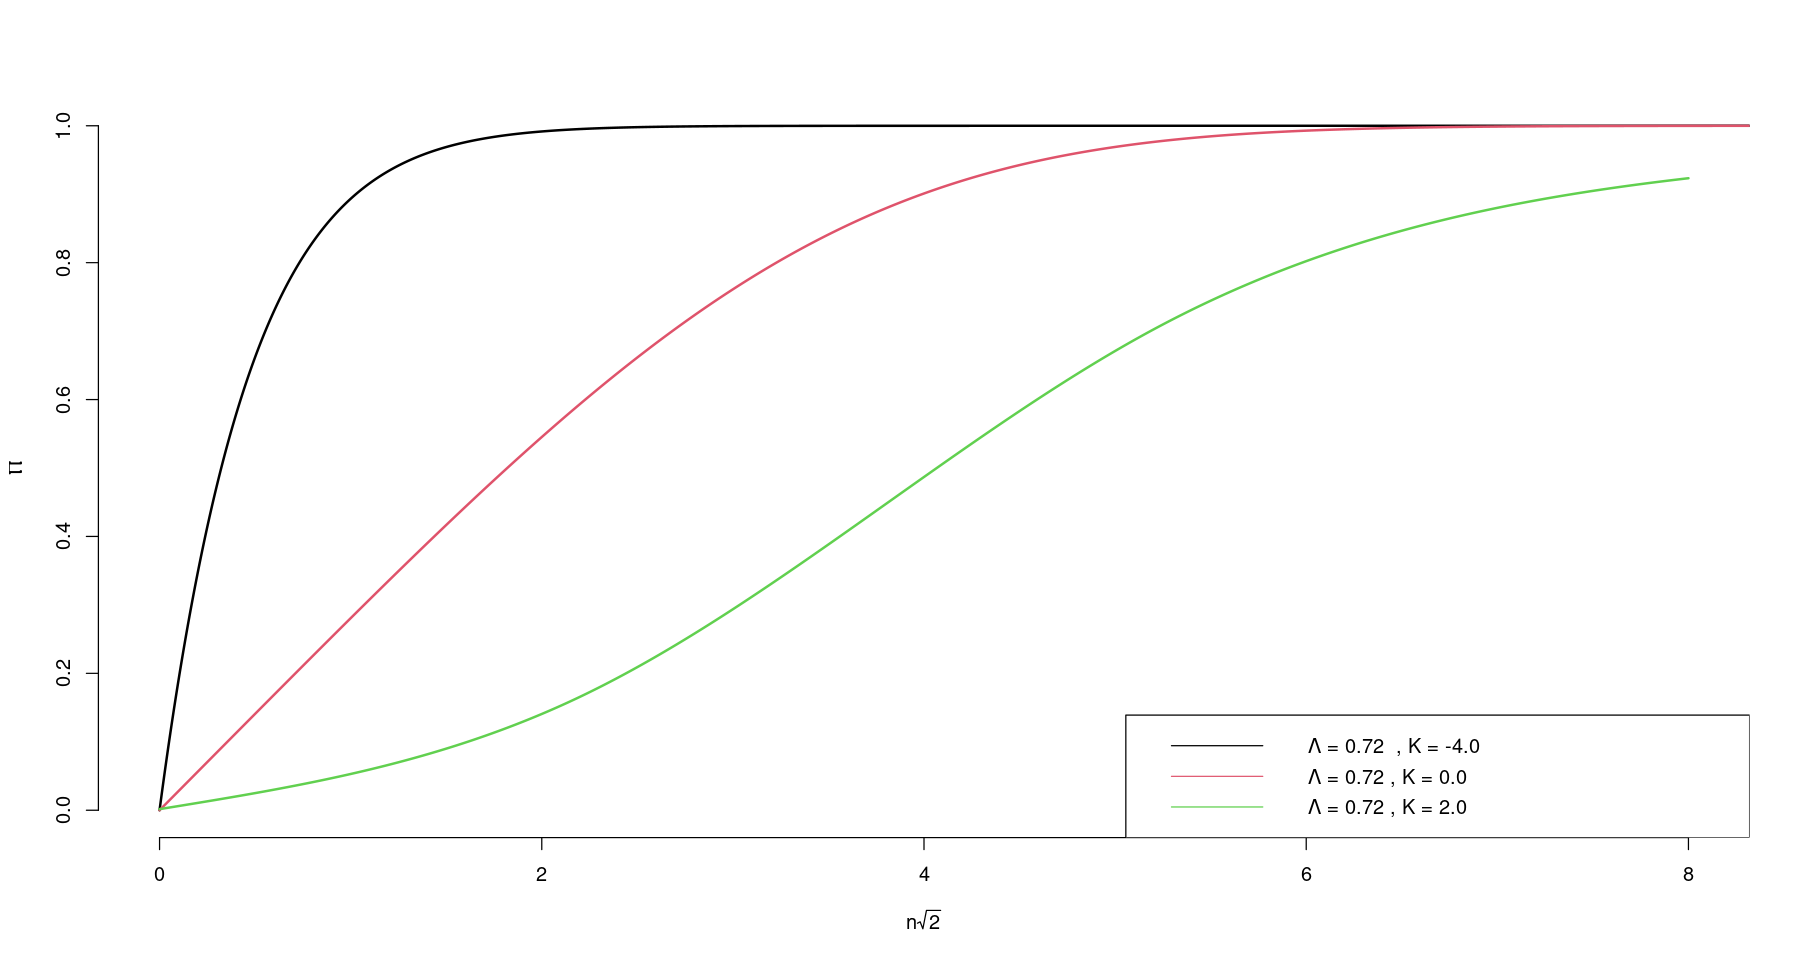

In [395]:
options(repr.plot.width=15, repr.plot.height=8)

plot(  data4$h, x = x*sqrt(2), typ = "l", col = 1, xlim = c(0,8), bty = "n", ylim = c(0,1),  lwd = 2, xlab = expression(n *sqrt(2)), ylab = "\U02CA0" )
lines( data2$h, x = x*sqrt(2), col = 2,  lwd = 2 )
lines( y3 + data5$h *0, x = x, col = 3,  lwd = 2 )


legend(x = "bottomright", legend = c("\u039B = 0.72  , K = -4.0",                                   
                                  "\u039B = 0.72 , K = 0.0", 
                                  "\u039B = 0.72 , K = 2.0" ), col = 1:8, lty = 1)

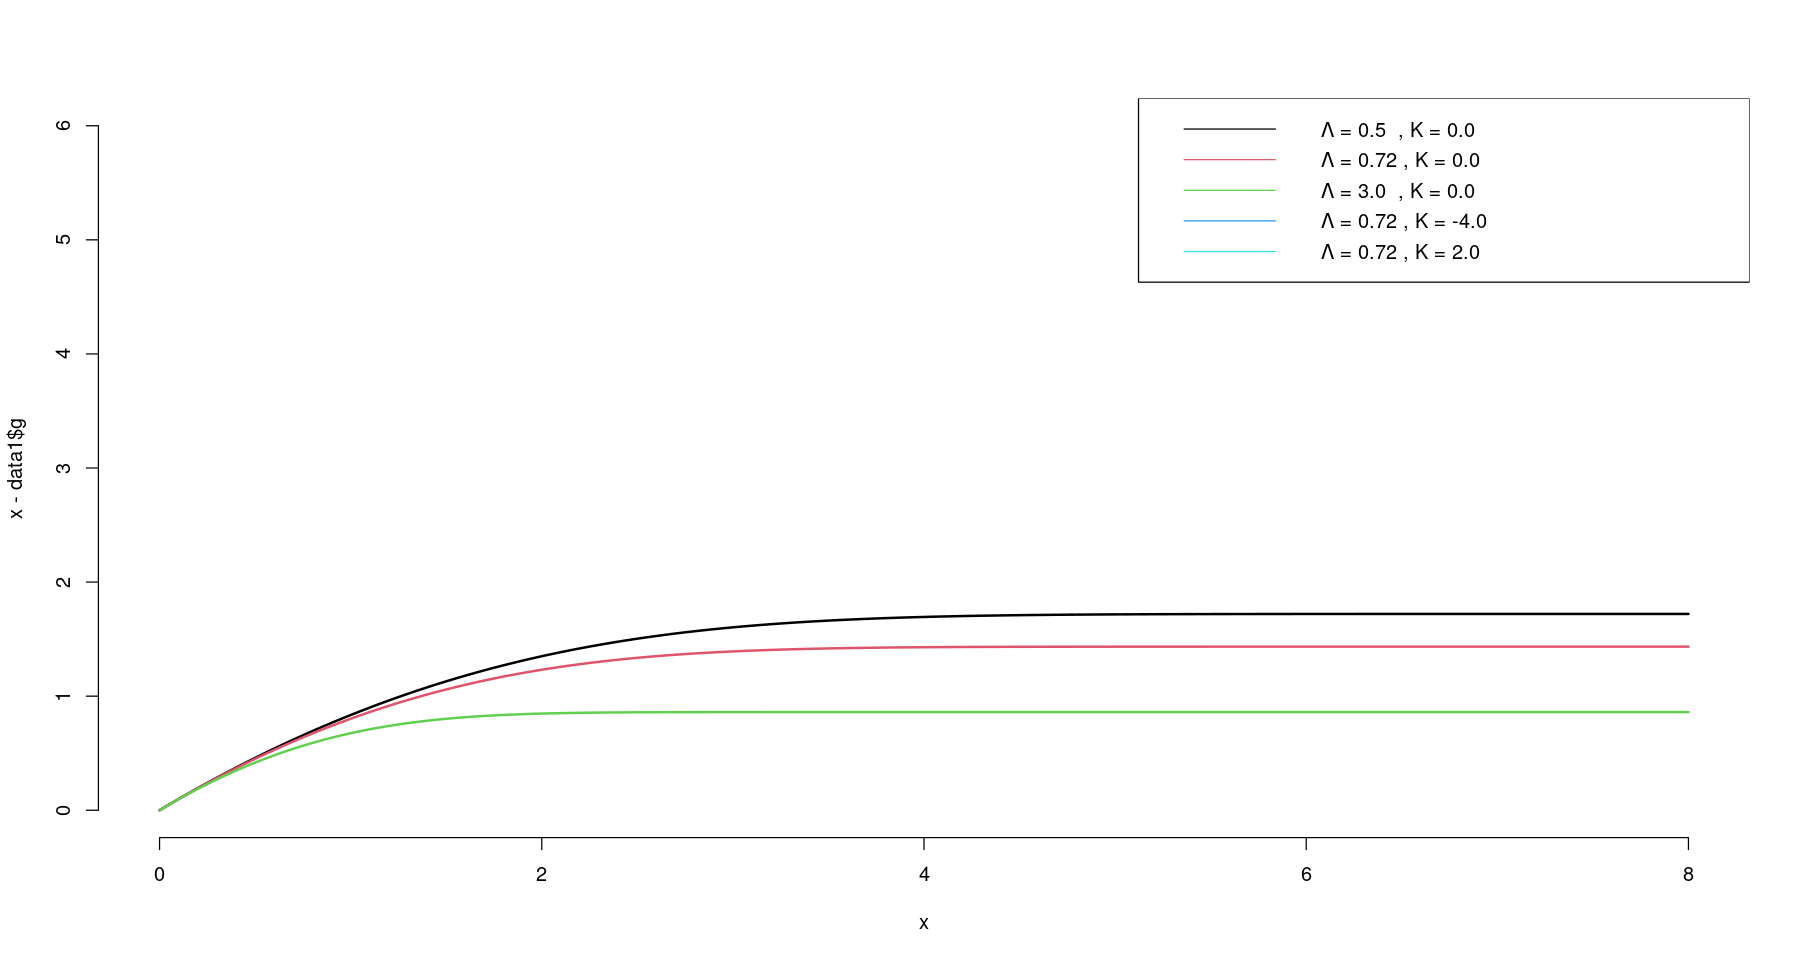

In [379]:
plot(  x - data1$g, x = x, typ = "l", col = 1, xlim = c(0,8), bty = "n", ylim = c(0,6),  lwd = 2 )
lines( x - data2$g, x = x, col = 2,  lwd = 2 )
lines( x - data3$g, x = x, col = 3,  lwd = 2 )
lines( x - data4$g, x = x, col = 4,  lwd = 2 )
lines( x - data5$g, x = x, col = 5,  lwd = 2 )

legend(x = "topright", legend = c("\u039B = 0.5  , K = 0.0",
                                  "\u039B = 0.72 , K = 0.0", 
                                  "\u039B = 3.0  , K = 0.0",
                                  "\u039B = 0.72 , K = -4.0", 
                                   "\u039B = 0.72 , K = 2.0" ), col = 1:8, lty = 1)